<a href="https://colab.research.google.com/github/Elineips/Programas_Python/blob/main/MecClassIElinei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Arquivo aberto!!
dados armazenados em pendamort.dat



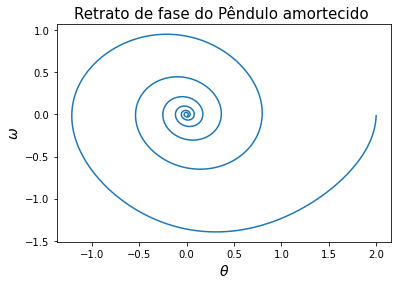

In [1]:
#mpl_pend_amor_rk2.py
'''Runge-Kutta-2a. ordem -solucao para sistema do pendulo amortecido
Programador: Elinei Santos
Data da utima revisao: 21/04/2021
dx/dt = y
dy/dt = -gama*y-sen(x)'''
import numpy as np
import matplotlib.pyplot as plt
from math import sin
N = 2           #/* numero de equacoes */
H = 0.04        #/* passo */
NTRANS = 10     #/* transiente */
NPT = 25000     #/* numero de pontos */
gama=0.2
h=H

y = np.zeros(N)
try:
    biflog=open("pendamort.dat","w")
    print("Arquivo aberto!!")
except IOError:
    print("Arguivo nao pode ser aberto\n")
g=gama      #/* parametro de controle */
y[0]=2.0   #/* valor inicial teta */
y[1]=0.0   #/* valor inicial omega */
T0 = 0.0   #/* tempo inicial */
t=T0
#/*------------------------------------------------------------------*/
#/* Subroutina Runge-Kutta 2a ordem */
def rk2( t, y, h, g):
    hh=h/2.0         #/* ponto medio */
    t1=np.zeros(N)   #/* armazenamento tempo */
    k1=np.zeros(N); k2=np.zeros(N)  #/* para Runge-Kutta*/
    for i in range(N):
        k1[i]=h*derivs(t,y,g,i)
        t1[i] = y[i]+0.5*(k1[i])
    for i in range(N):
        dt1 = t+hh
        k2[i]=h*derivs(dt1, t1, g, i)
    for i in range(N):
        y[i] += (h*k2[i])
#/*--------------------------------------------------------------------*/
#/* definicao das equacoes das derivadas - Pendulo amortecido */
def derivs(t, y, g, i):
    if (i == 0):
        return y[1]
    elif (i == 1):
        return -g*y[1]-sin(y[0])
stepCnt = NPT
# Valores para o grafico
xs = np.empty(stepCnt)
ys = np.empty(stepCnt)
for i in range(NTRANS): #/* eliminar o transiente */
    rk2(t, y, h, g)
    t+=h
t=0.0
for i in range(NPT): # /* gravar NPT pontos */
    rk2(t, y, h, g)
    xs[i]= y[0]
    ys[i]= y[1]
    biflog.write("%.2f \t %.2f \t %.2f \n" %(t,y[0],y[1]))
    t+=h
print("dados armazenados em pendamort.dat\n")
biflog.close()
plt.title("Retrato de fase do Pêndulo amortecido ", fontsize=15)
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$\omega$', fontsize=14)
plt.plot(xs,ys)
plt.show()